# Check issue with track cluster association


We (Michele and Dolores) think that the bad performance of the tagger comes from an issue in Pandora. The issue is that sometimes tracks get lost. I check this. 

In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
def load_data(file_name):
    file = uproot.open(file_name)
    tree = file['tree;1']
    data = tree.arrays(library="np", entry_start=0, entry_stop=100000)
    return data

In [3]:
path= "/eos/experiment/fcc/ee/datasets/CLD_fullsim_tagging_trackPFOcheck/hadded"
dic = {
    "bb": np.array([]),
    "gg": np.array([]),
    "tautau": np.array([])
}

for process in dic.keys():
    data = load_data(f"{path}/H{process}.root")
    dic[process] = data

In [4]:
dic.keys()

dict_keys(['bb', 'gg', 'tautau'])

In [5]:
file = load_data("/home/saaumill/FullSimTagger/test/Hbb_trackPFOcheck.root")

In [6]:
ind_e = np.where(abs(np.concatenate(dic["bb"]["mcpid"])) == 11)
ind_mu = np.where(abs(np.concatenate(dic["bb"]["mcpid"])) == 13)
ind_chad = np.where(abs(np.concatenate(dic["bb"]["mcpid"])) == 211)

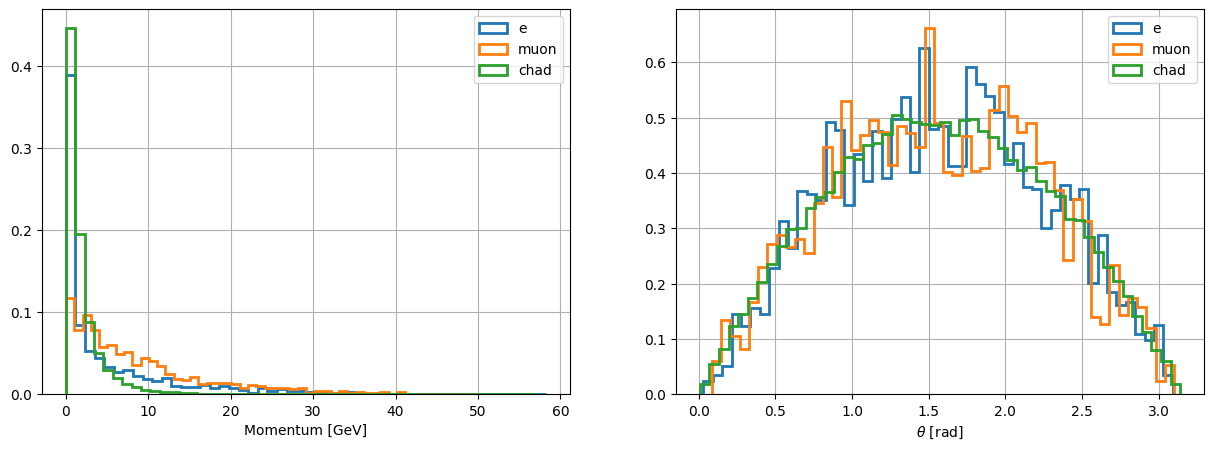

In [15]:
bins = 50
d = True
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(np.concatenate(dic["bb"]["momentum"])[ind_e], bins=bins, histtype='step', linewidth=2.0, label="e", density=d)
ax[0].hist(np.concatenate(dic["bb"]["momentum"])[ind_mu], bins=bins, histtype='step', linewidth=2.0, label="muon", density=d)
ax[0].hist(np.concatenate(dic["bb"]["momentum"])[ind_chad], bins=bins, histtype='step', linewidth=2.0, label="chad", density=d)
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel("Momentum [GeV]")

ax[1].hist(np.concatenate(dic["bb"]["theta"])[ind_e], bins=bins, histtype='step', linewidth=2.0, label="e", density=d)
ax[1].hist(np.concatenate(dic["bb"]["theta"])[ind_mu], bins=bins, histtype='step', linewidth=2.0, label="muon", density=d)
ax[1].hist(np.concatenate(dic["bb"]["theta"])[ind_chad], bins=bins, histtype='step', linewidth=2.0, label="chad", density=d)
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel(r"$\theta$ [rad]")

plt.show()

Now lets do these kind of plots but for each id (e, muon, chad) and in every histo, let's divide by the pfo track, pfo neutral of pfo loss.

In [12]:
ind_pfo_track = np.where(np.concatenate(dic["bb"]["mc_pfo_type"]) == 2)
ind_pfo_neutral = np.where(np.concatenate(dic["bb"]["mc_pfo_type"]) == 1)
ind_pfo_loss = np.where(np.concatenate(dic["bb"]["mc_pfo_type"]) == 0)

In [38]:
def subplot_pfo_div(j, ax, i_pfo_track, i_pfo_neutral, i_pfo_loss, l):
    d=False

    ax[0, j].hist(np.concatenate(dic["bb"]["momentum"])[i_pfo_track], bins=bins, range=[0, 50], histtype='step', linewidth=2.0, label=f"MC {l}, track", density=d)
    ax[0, j].hist(np.concatenate(dic["bb"]["momentum"])[i_pfo_neutral], bins=bins, range=[0, 50], histtype='step', linewidth=2.0, label=f"MC {l}, neutral", density=d)
    ax[0, j].hist(np.concatenate(dic["bb"]["momentum"])[i_pfo_loss], bins=bins, range=[0, 50], histtype='step', linewidth=2.0, label=f"MC {l}, loss", density=d)
    ax[0, j].grid()
    ax[0, j].legend()
    ax[0, j].set_xlabel(f"MC {l}, Momentum [GeV]")
    ax[0, j].set_yscale("log")
    ax[1, j].hist(np.concatenate(dic["bb"]["theta"])[i_pfo_track], bins=bins, histtype='step', linewidth=2.0, label=f"MC {l}, track", density=d)
    ax[1, j].hist(np.concatenate(dic["bb"]["theta"])[i_pfo_neutral], bins=bins, histtype='step', linewidth=2.0, label=f"MC {l}, neutral", density=d)
    ax[1, j].hist(np.concatenate(dic["bb"]["theta"])[i_pfo_loss], bins=bins, histtype='step', linewidth=2.0, label=f"MC {l}, loss", density=d)
    ax[1, j].grid()
    ax[1, j].legend()
    ax[1, j].set_xlabel(r"$\theta$ [rad]")

In [43]:
def plot_pfo_alltype(Htype="bb"):

    ind_pfo_track = np.where(np.concatenate(dic[Htype]["mc_pfo_type"]) == 2)
    ind_pfo_neutral = np.where(np.concatenate(dic[Htype]["mc_pfo_type"]) == 1)
    ind_pfo_loss = np.where(np.concatenate(dic[Htype]["mc_pfo_type"]) == 0)


    fig, ax = plt.subplots(2,3, figsize=(20,8))
    fig.suptitle(f"H{Htype}")
    i_pfo_track = np.intersect1d(x, ind_e)
    i_pfo_neutral = np.intersect1d(ind_pfo_neutral, ind_e)
    i_pfo_loss = np.intersect1d(ind_pfo_loss, ind_e)
    subplot_pfo_div(0,ax, i_pfo_track, i_pfo_neutral, i_pfo_loss, l="e")
    i_pfo_track = np.intersect1d(ind_pfo_track, ind_mu)
    i_pfo_neutral = np.intersect1d(ind_pfo_neutral, ind_mu)
    i_pfo_loss = np.intersect1d(ind_pfo_loss, ind_mu)
    subplot_pfo_div(1,ax, i_pfo_track, i_pfo_neutral, i_pfo_loss, l="muon")
    i_pfo_track = np.intersect1d(ind_pfo_track, ind_chad)
    i_pfo_neutral = np.intersect1d(ind_pfo_neutral, ind_chad)
    i_pfo_loss = np.intersect1d(ind_pfo_loss, ind_chad)
    subplot_pfo_div(2,ax, i_pfo_track, i_pfo_neutral, i_pfo_loss, l="chad")

    plt.tight_layout()
    plt.show()

    

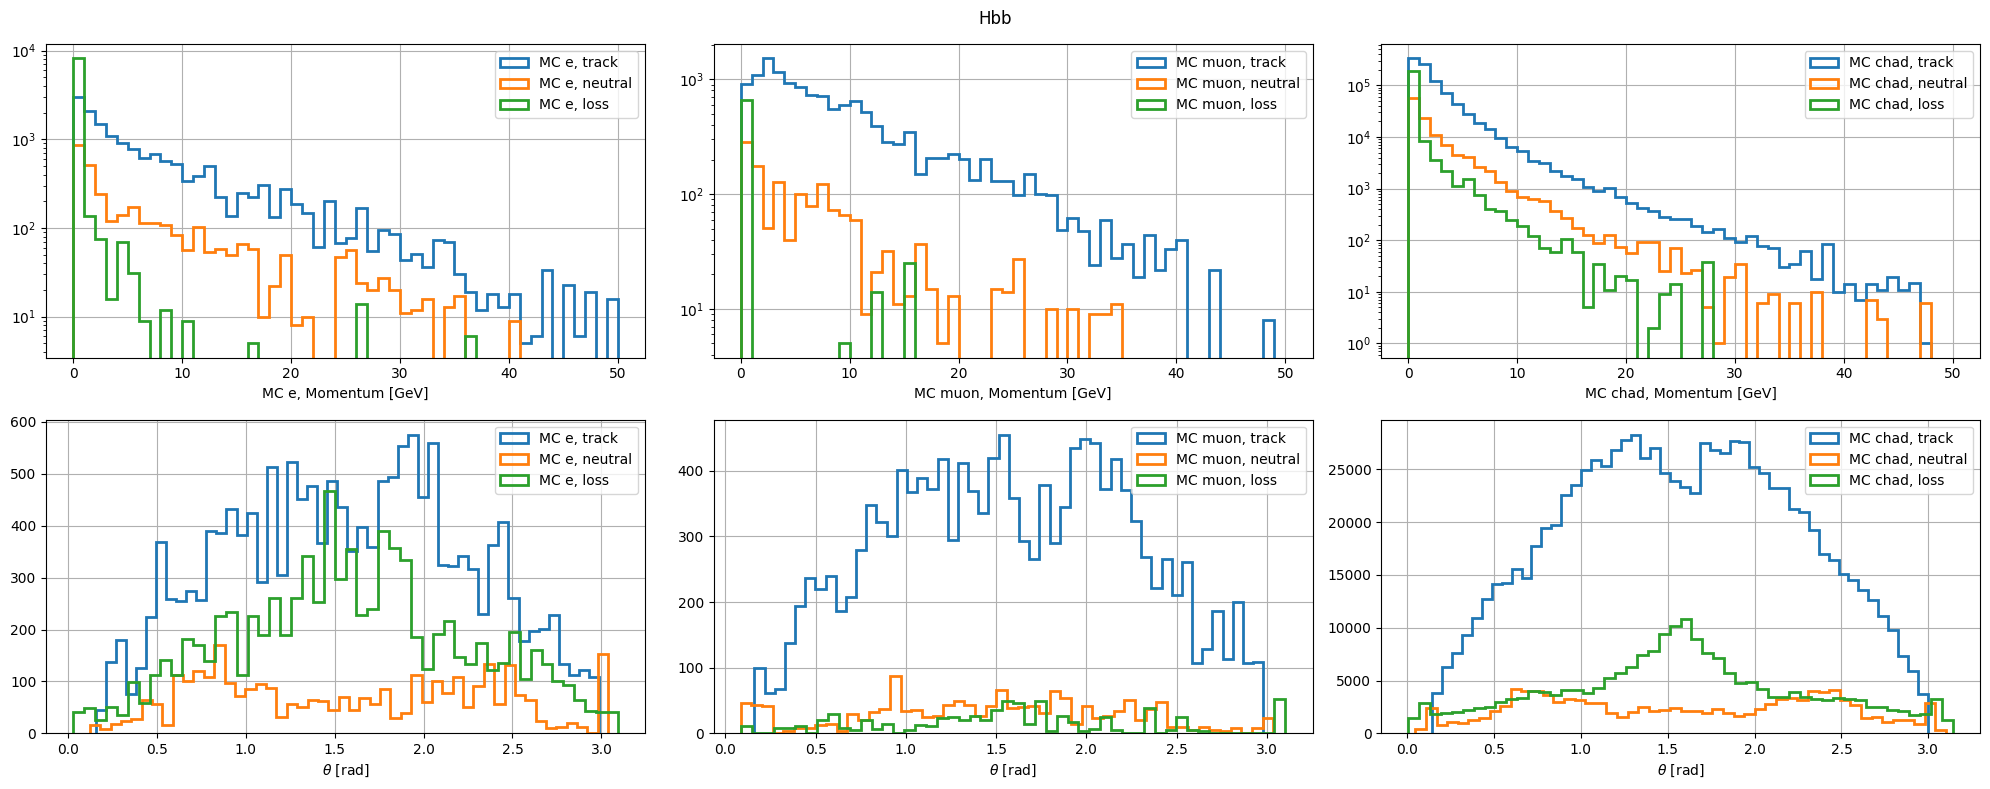

In [44]:
plot_pfo_alltype()